<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Wine Quality</font></h1>
<h2 align="center"><font size="5">Deadline: 2020-08-16 18:00:00</font></h2>
<h3 align="center"><font size="5"> Total marks: 4.0</font></h3>

### Your information:
- Fullname: Trẩn Bửu Hiệp
- Date of birth: 21/07/1997
- Place of birth: Đồng Nai
- Email: hieplk97@gmail.com
- Mobile phone: 0962057721

In this notebook, we practice all the knowledge and skills that we learned in this course.
Please choose one suitable algorithm (**Linear Regression**) to predict: "wine quality" by accuracy evaluation methods.

Please read [Wine Quality information](https://archive.ics.uci.edu/ml/datasets/wine+quality) carefully before you do this project! 

Dataset: winequality-red.csv and winequality-white.csv

#### Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

###### Output variable (based on sensory data):
12. quality (score between 0 and 10)

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

In [1]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df_red_wine = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
df_red_wine.shape

(1599, 12)

In [4]:
df_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df_red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df_red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Calculate and order correlations
correlations = df_red_wine.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [8]:
# Get correlated columns 
print(abs(correlations) > 0.2) 

quality                  True
alcohol                  True
sulphates                True
citric acid              True
fixed acidity           False
residual sugar          False
free sulfur dioxide     False
pH                      False
chlorides               False
density                 False
total sulfur dioxide    False
volatile acidity         True
Name: quality, dtype: bool


### => Các yếu tố ảnh hưởng đến chất lượng rượu gồm 'alcohol', 'sulphates', 'citric acid', 'volatile acidity'

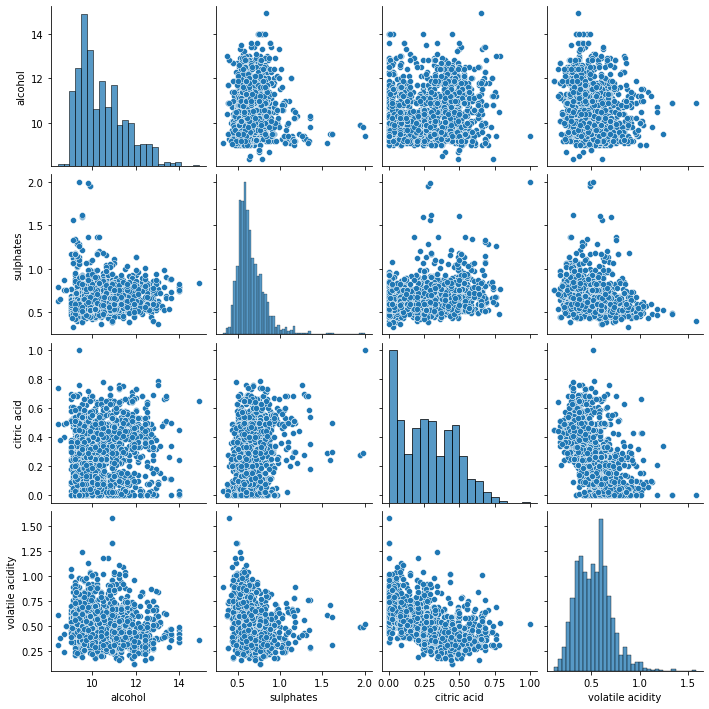

In [9]:
sns.pairplot(df_red_wine[['alcohol', 'sulphates', 'citric acid', 'volatile acidity']])
plt.show()

### Các feature độc lập và không có tương quan với nhau

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

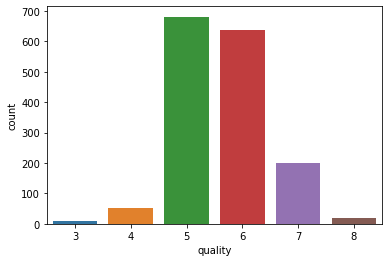

In [10]:
# Kiểm tra xem có bao nhiêu loại rượu
sns.countplot(df_red_wine['quality'])

In [11]:
df_red_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Singel Linear Regression

In [12]:
# Chia dữ liệu thành 2 phần test và train
from sklearn.model_selection import train_test_split

In [13]:
X_alcohol = df_red_wine[['alcohol']]
y = df_red_wine['quality']

In [14]:
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X_alcohol, y, test_size=0.2, random_state=1)

In [15]:
from sklearn.linear_model import LinearRegression

In [18]:
#Fit the model and make prediction
regressor_slr = LinearRegression()
regressor_slr.fit(X_train_slr, y_train_slr)
y_prediction_slr = regressor_slr.predict(X_test_slr)
y_prediction_slr = np.round(y_prediction_slr)

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
# Find R^2
print('The R-square value of model is:', regressor_slr.score(X_alcohol, y))

The R-square value of model is: 0.22664641673649222


In [21]:
# Find the MSE
mse = mean_squared_error(y, regressor_slr.predict(X_alcohol))
print('The mean square error of FEV and predicted value is: ', mse)

The mean square error of FEV and predicted value is:  0.5040413489079287


In [22]:
from sklearn.metrics import confusion_matrix

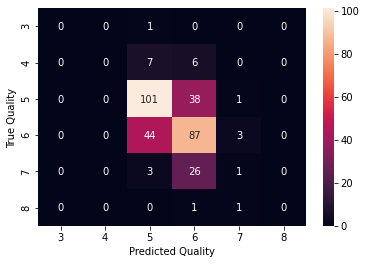

In [23]:
#Confussion Matrix for the Linear Regression Model
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(y_test_slr,y_prediction_slr)
cm_lr = pd.DataFrame(cm_linear_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


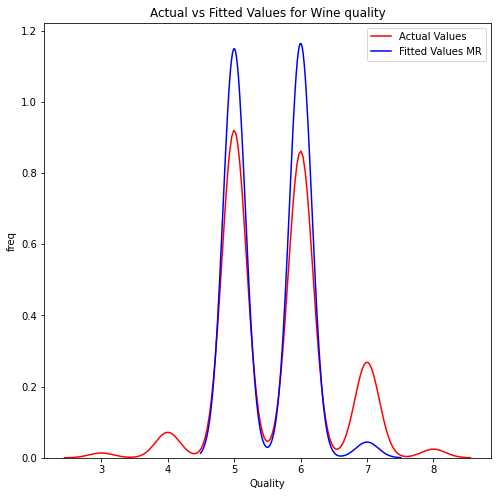

In [24]:
# Distribution plot
plt.figure(figsize=(8, 8))
ax1 = sns.distplot(y, hist=False, color='r', label='Actual Values')
sns.distplot(y_prediction_slr, hist=False, color='b', label='Fitted Values MR', ax=ax1)

plt.title('Actual vs Fitted Values for Wine quality')
plt.xlabel('Quality')
plt.ylabel('freq')
plt.legend()
plt.show()
plt.close()

## Multiple Linear Regression

In [25]:
X = df_red_wine[['alcohol', 'sulphates', 'citric acid', 'volatile acidity']]
y = df_red_wine['quality']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [29]:
#Fit the model and make prediction
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction_lr = regressor.predict(X_test)
y_prediction_lr = np.round(y_prediction_lr)

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
# Find R^2
print('The R-square value of model is:', regressor.score(X, y))

The R-square value of model is: 0.3358461943888531


In [32]:
# Find the MSE
mse = mean_squared_error(y, regressor.predict(X))
print('The mean square error of FEV and predicted value is: ', mse)

The mean square error of FEV and predicted value is:  0.43286924287581974


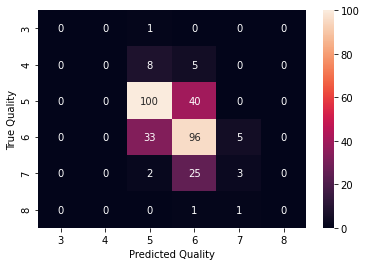

In [33]:
#Confussion Matrix for the Linear Regression Model
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(y_test,y_prediction_lr)
cm_lr = pd.DataFrame(cm_linear_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

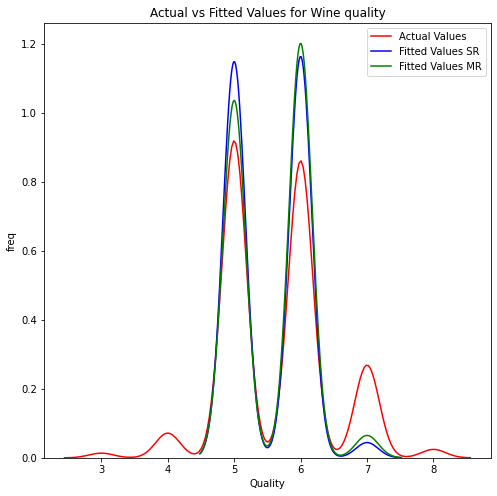

In [34]:
# Distribution plot
plt.figure(figsize=(8, 8))
ax1 = sns.distplot(y, hist=False, color='r', label='Actual Values')
sns.distplot(y_prediction_slr, hist=False, color='b', label='Fitted Values SR', ax=ax1)
sns.distplot(y_prediction_lr, hist=False, color='g', label='Fitted Values MR', ax=ax1)

plt.title('Actual vs Fitted Values for Wine quality')
plt.xlabel('Quality')
plt.ylabel('freq')
plt.legend()
plt.show()
plt.close()

## Multiple Polynomial

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [38]:
X_pr = pr.fit_transform(X_train)

In [41]:
lm_pr = LinearRegression()
lm_pr.fit(X_pr, y_train)
X_pr_test = pr.fit_transform(X_test)
yhat = lm_pr.predict(X_pr_test)

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

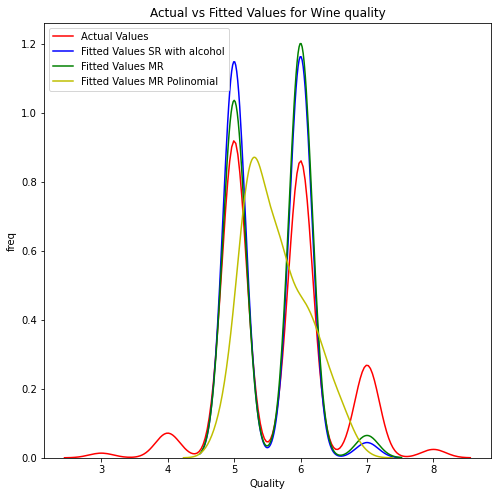

In [46]:
# Distribution plot
plt.figure(figsize=(8, 8))
ax1 = sns.distplot(y, hist=False, color='r', label='Actual Values')
sns.distplot(y_prediction_slr, hist=False, color='b', label='Fitted Values SR with alcohol', ax=ax1)
sns.distplot(y_prediction_lr, hist=False, color='g', label='Fitted Values MR', ax=ax1)
sns.distplot(yhat, hist=False, color='y', label='Fitted Values MR Polinomial', ax=ax1)

plt.title('Actual vs Fitted Values for Wine quality')
plt.xlabel('Quality')
plt.ylabel('freq')
plt.legend()
plt.show()
plt.close()

## Kết luận:
### Mô hình phù hợp nhất là Multiple Linear Regression